# California K-12 Public Schools
## Predicting Test Performance

<img src='../images/education_test.jpg' width="900">
   
**Credit:**  [state.gov](https://www.state.gov/wp-content/uploads/2018/12/shutterstock_251933845-e1554817266526-2560x852.jpg)

In [1]:
# load packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import seed
from scipy.stats import t
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
import warnings
warnings.filterwarnings("ignore")  # Suppress all warnings

In [2]:
# load file
language = pd.read_csv('data/df_language_with_dummies')

# copy original df
language_df = language.copy()

# Hypotheses Testing:

1. Students living in higher income zip codes pass standard tests scores at higher rate than students living in lower income zip codes.

2. Schools with more students fluent in English pass standard tests scores at higher rate than schools with more English learners.

3. Schools with more not disadvantaged students pass standard tests scores at higher rate than schools with more disadvantaged students.

### 1. Students living in higher income zip codes pass standard tests scores at higher rate than students living in lower income zip codes.

In [3]:
# Filter high income
high_income = language_df[language_df['Median Household Income'] > 125000]

# Calculate mean, std, median
pass_mean_hi = np.mean(high_income['Percentage Standard Met and Above'])
pass_std_hi = np.std(high_income['Percentage Standard Met and Above'])
pass_median_hi = np.median(high_income['Percentage Standard Met and Above'])

# Print
print('mean: ', pass_mean_hi)
print('standard deviation: ', pass_std_hi)
print('median: ', pass_median_hi)

mean:  80.32412556053812
standard deviation:  11.002917958775884
median:  82.56


In [4]:
# Filter high income
low_income = language_df[language_df['Median Household Income'] < 30000]

# Calculate mean, std, median
pass_mean_lo = np.mean(low_income['Percentage Standard Met and Above'])
pass_std_lo = np.std(low_income['Percentage Standard Met and Above'])
pass_median_lo = np.median(low_income['Percentage Standard Met and Above'])

# Print
print('mean: ', pass_mean_lo)
print('standard deviation: ', pass_std_lo)
print('median: ', pass_median_lo)

mean:  33.06327027027025
standard deviation:  17.102092897288756
median:  31.22


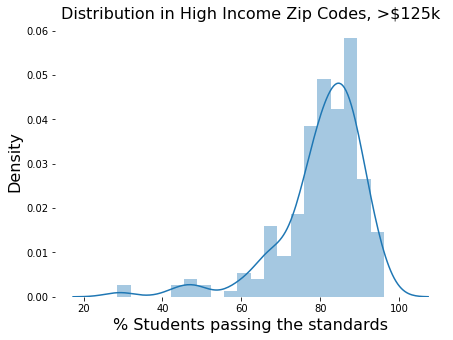

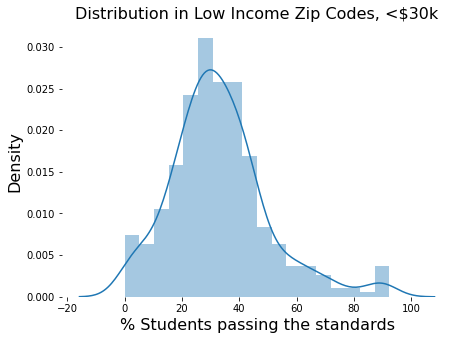

In [5]:
# Distribution plot
plt.figure(figsize=(7,5))
sns.distplot(high_income['Percentage Standard Met and Above'])
plt.title('Distribution in High Income Zip Codes, >$125k', fontsize = 16)

# Adding labels
_ = plt.xlabel('% Students passing the standards', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)

plt.box(False)
plt.show()

# Distribution plot
plt.figure(figsize=(7,5))
sns.distplot(low_income['Percentage Standard Met and Above'])
plt.title('Distribution in Low Income Zip Codes, <$30k', fontsize = 16)

# Adding labels
_ = plt.xlabel('% Students passing the standards', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)

plt.box(False)
plt.show()

In [6]:
# Get the passing tests into array format
high = high_income['Percentage Standard Met and Above'] 
low = low_income['Percentage Standard Met and Above']

# Hypothesis test
ttest, pval = ttest_ind(high, low)
print("p-value", pval)

if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

p-value 2.721725689807176e-155
we reject null hypothesis


-----

### 2. Schools with more students fluent in English pass standard tests scores at higher rate than schools with more English learners.

In [7]:
# Filter English fluent
english_fluent = language_df[language_df['Fluent English'] > 50]

# Calculate mean, std, median
pass_mean_fluent = np.mean(english_fluent['Percentage Standard Met and Above'])
pass_std_fluent = np.std(english_fluent['Percentage Standard Met and Above'])
pass_median_fluent = np.median(english_fluent['Percentage Standard Met and Above'])

# Print
print('mean: ', pass_mean_fluent)
print('standard deviation: ', pass_std_fluent)
print('median: ', pass_median_fluent)

mean:  48.58274883569822
standard deviation:  20.56697767265566
median:  47.75


In [8]:
# Filter English learner
english_learner = language_df[language_df['English Learner'] > 50]

# Calculate mean, std, median
pass_mean_learner = np.mean(english_learner['Percentage Standard Met and Above'])
pass_std_learner = np.std(english_learner['Percentage Standard Met and Above'])
pass_median_learner = np.median(english_learner['Percentage Standard Met and Above'])

# Print
print('mean: ', pass_mean_learner)
print('standard deviation: ', pass_std_learner)
print('median: ', pass_median_learner)

mean:  29.06712082262211
standard deviation:  11.547371792287173
median:  29.75


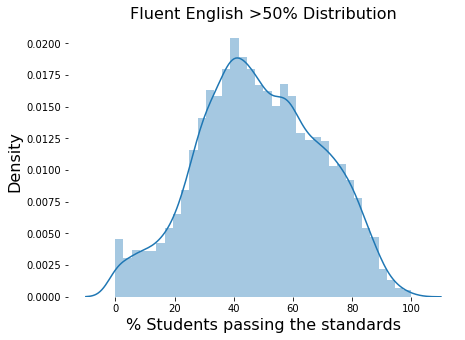

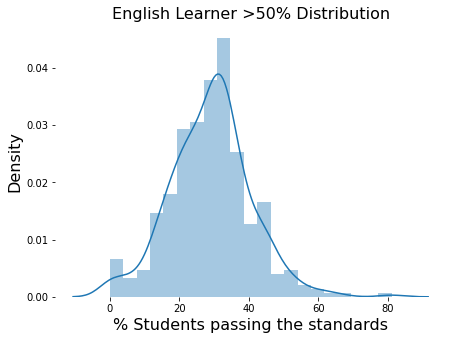

In [9]:
# Distribution plot
plt.figure(figsize=(7,5))
sns.distplot(english_fluent['Percentage Standard Met and Above'])
plt.title('Fluent English >50% Distribution', fontsize = 16)

# Adding labels
_ = plt.xlabel('% Students passing the standards', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)

plt.box(False)
plt.show()

# Distribution plot
plt.figure(figsize=(7,5))
sns.distplot(english_learner['Percentage Standard Met and Above'])
plt.title('English Learner >50% Distribution', fontsize = 16)

# Adding labels
_ = plt.xlabel('% Students passing the standards', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)

plt.box(False)
plt.show()

In [10]:
# Get the passing tests into array format
fluent = english_fluent['Percentage Standard Met and Above']
learner = english_learner['Percentage Standard Met and Above']

# Hypothesis test
ttest, pval = ttest_ind(fluent, learner)
print("p-value", pval)

if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

p-value 8.183446330224692e-76
we reject null hypothesis


-------

### 3. Schools with more not disadvantaged students pass standard tests scores at higher rate than schools with more disadvantaged students.

In [11]:
# Filter Not Disadvantaged
not_disadvantaged = language_df[language_df['Not Disadvantaged'] > 50]

# Calculate mean, std, median
pass_mean_notdis = np.mean(not_disadvantaged['Percentage Standard Met and Above'])
pass_std_notdis = np.std(not_disadvantaged['Percentage Standard Met and Above'])
pass_median_notdis = np.median(not_disadvantaged['Percentage Standard Met and Above'])

# Print
print('mean: ', pass_mean_notdis)
print('standard deviation: ', pass_std_notdis)
print('median: ', pass_median_notdis)

mean:  66.75446129032257
standard deviation:  15.685414745617967
median:  68.85


In [12]:
# Filter Disadvantaged
disadvantaged = language_df[language_df['Disadvantaged'] > 50]

# Calculate mean, std, median
pass_mean_dis = np.mean(disadvantaged['Percentage Standard Met and Above'])
pass_std_dis = np.std(disadvantaged['Percentage Standard Met and Above'])
pass_median_dis = np.median(disadvantaged['Percentage Standard Met and Above'])

# Print
print('mean: ', pass_mean_dis)
print('standard deviation: ', pass_std_dis)
print('median: ', pass_median_dis)

mean:  38.73313908909673
standard deviation:  16.085450200398277
median:  38.99


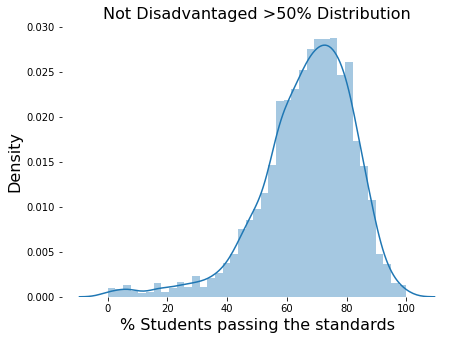

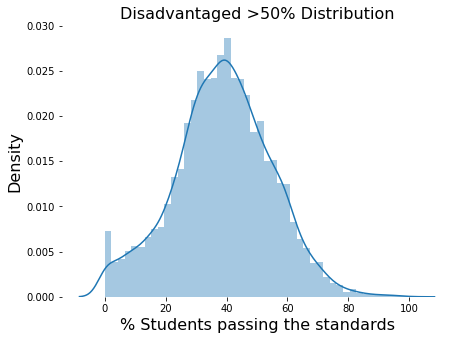

In [13]:
# Distribution plot
plt.figure(figsize=(7,5))
sns.distplot(not_disadvantaged['Percentage Standard Met and Above'])
plt.title('Not Disadvantaged >50% Distribution', fontsize = 16)

# Adding labels
_ = plt.xlabel('% Students passing the standards', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)

plt.box(False)
plt.show()

# Distribution plot
plt.figure(figsize=(7,5))
sns.distplot(disadvantaged['Percentage Standard Met and Above'])
plt.title('Disadvantaged >50% Distribution', fontsize = 16)

# Adding labels
_ = plt.xlabel('% Students passing the standards', fontsize=16)
_ = plt.ylabel('Density', fontsize=16)

plt.box(False)
plt.show()

In [14]:
# Get the passing tests into array format
not_disadvantaged = not_disadvantaged['Percentage Standard Met and Above']
disadvantaged = disadvantaged['Percentage Standard Met and Above']

# Hypothesis test
ttest, pval = ttest_ind(not_disadvantaged, disadvantaged)
print("p-value", pval)

if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

p-value 0.0
we reject null hypothesis


--------